In [3]:
import pandas as pd

# Load data
df = pd.read_csv("application_train.csv")

# Ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

# Persentase missing value tertinggi
print("\n10 kolom dengan missing value terbanyak:")
print(df.isnull().mean().sort_values(ascending=False).head(10))

# Contoh 5 baris pertama
print("\nContoh data:")
print(df.head())

# Distribusi target
print("\nDistribusi TARGET (0 = tidak gagal bayar, 1 = gagal bayar):")
print(df['TARGET'].value_counts(normalize=True))


Jumlah baris dan kolom: (307511, 122)

10 kolom dengan missing value terbanyak:
COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
dtype: float64

Contoh data:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("application_train.csv")

# Pilih kolom numerik penting
selected_cols = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]
df_subset = df[selected_cols]

# Imputasi missing value (median)
df_subset = df_subset.fillna(df_subset.median(numeric_only=True))

# Pisahkan fitur dan target
X = df_subset.drop(columns='TARGET')
y = df_subset['TARGET']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X_scaled.shape, y.shape)


(307511, 13) (307511,)


In [7]:
import joblib
joblib.dump((X_scaled, y), "scaled_data.pkl")

['scaled_data.pkl']

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
ROC AUC: 0.7274563815896603

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     56538
           1       0.15      0.65      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503



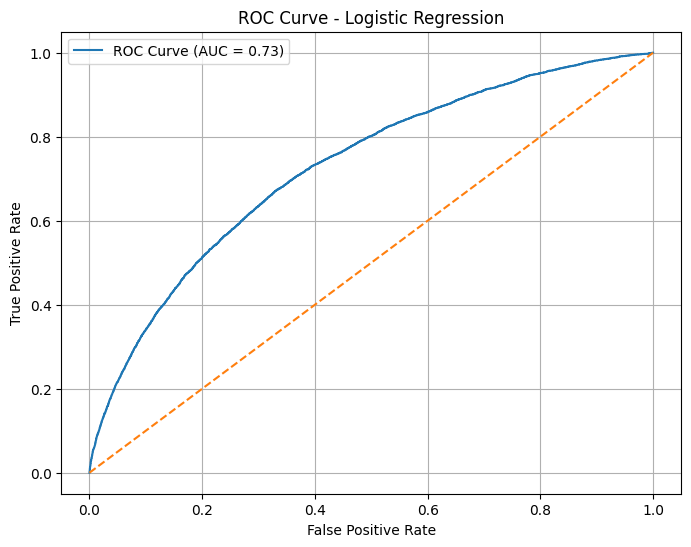

In [8]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data (hanya kolom penting)
use_cols = [
    'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

df = pd.read_csv("application_train.csv", usecols=use_cols)

# 3. Imputasi missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# 4. Pisahkan fitur dan target
X = df.drop(columns="TARGET")
y = df["TARGET"]

# 5. Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Hyperparameter tuning (GridSearchCV)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 8. Evaluasi model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()


C:\Users\Mohammad Ilyasin\AppData\Local\Temp\ipykernel_10140\2193767485.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs_sorted.values, y=coefs_sorted.index, palette="coolwarm")


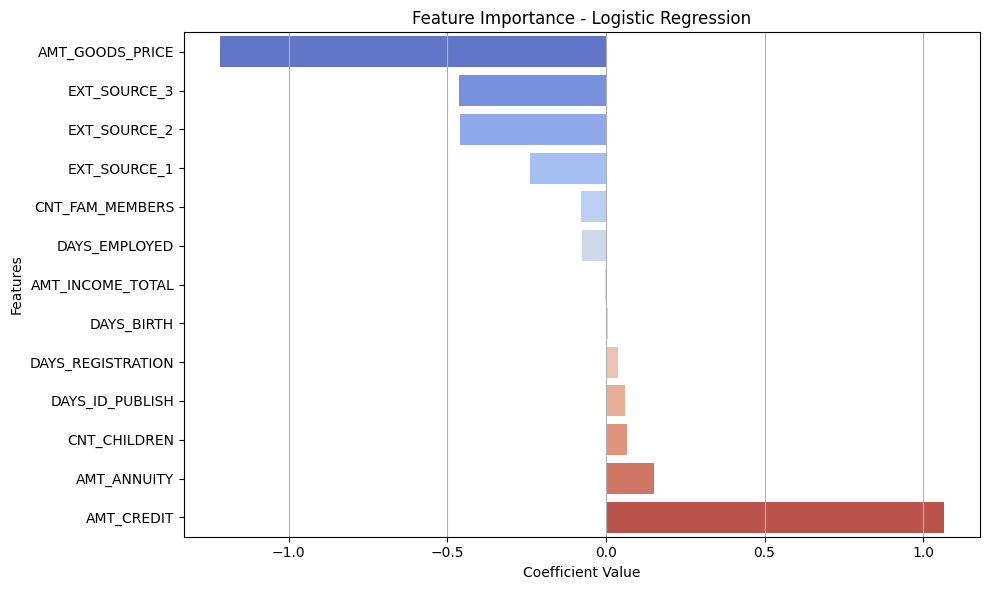

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan kamu sudah punya 'best_model' dan 'X.columns'

# Ambil koefisien dari model
coefs = pd.Series(best_model.coef_[0], index=X.columns)

# Urutkan berdasarkan besarnya pengaruh (positif & negatif)
coefs_sorted = coefs.sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefs_sorted.values, y=coefs_sorted.index, palette="coolwarm")
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(axis='x')
plt.show()


In [10]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC Score (CV): 0.7263165618253314


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56538
           1       0.15      0.65      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503



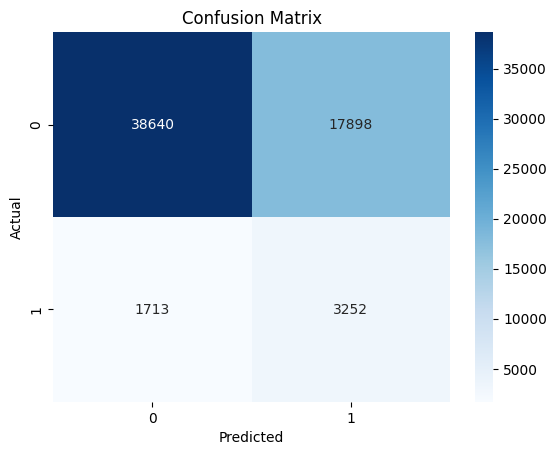

ROC AUC Score: 0.7275


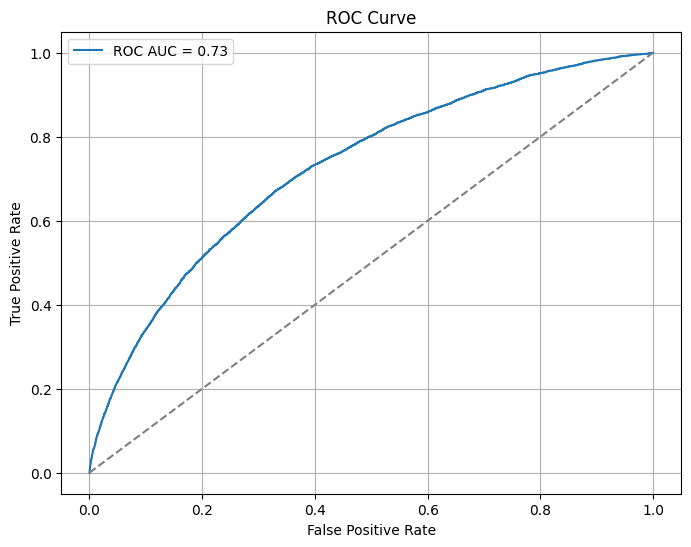

In [11]:
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
